In [21]:
import numpy as np
import soundfile as sf
import math
from scipy import signal
import scipy
import matplotlib.pyplot as plt
import librosa

In [67]:
def fft(path):
    '''
    This function returns the fourier transform  of a 1-channel signal.
    
    Inputs
    =======
    The directory of a wav file, path.
    
    outputs
    =======
    the fourier transform of the signal,array y.
    
    
    '''
    
    
    
    
    d,s = sf.read(path)

    x = scipy.fft.fft(d,axis=-1) 
    d1 = scipy.fft.ifft(x,axis=-1) 
    
    #print(np.real(scipy.fft.ifft(scipy.fft.fft(d)))==d)
    
    #print(d.shape)
    #print(np.real(d1))
    d=d.reshape(1024,1)
    d1=d1.reshape(1024,1)
    x=np.linspace(0,22050,num=1024)

    plt.legend()
    #np.set_printoptions(threshold=np.inf)
    #np.set_printoptions(threshold=np.real(d1).maxsize)
    
    #xm = np.abs(x)
    
    #x1=xm[511:1024]
    
    #start = xm.size/2-1
    
    #end= xm.size
    
    #length=end-start
    
    #x1=xm[start:end]
    
    #x1=x1.reshape(513,1)
    
    #x1=x1.reshape((length,1))
    
    #y =10 * np.log10(x1**2)
    
    #return y

No handles with labels found to put in legend.


NameError: name 'x' is not defined

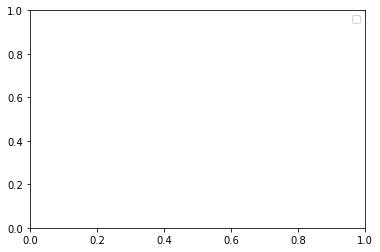

In [68]:
fft('/Users/eeeds/Desktop/yg/hpcf/HpCF_Beyerdynamic_Custom_One_Pro_E.wav')
plt.plot(x,d,label='x')
plt.plot(x,d1,label='d1')

In [14]:
def stft(path,fftsize):
    
    '''
    This function returns the entire fourier transform with uniform window of a 1-channel signal.
    
    Inputs
    =======
    The directory of a wav file, path.
    
    the FFT size , which is equal to your signal length , fftsize.
    
    outputs
    =======
    the fourier transform of the signal,array y.
    
    
    '''
    d,s = sf.read(path)
    
    win1 = np.ones((fftsize,))
    
    x=librosa.core.stft(d, n_fft=fftsize, hop_length = 2*fftsize, win_length=fftsize, window=win1,center=False)
   
    xm=np.abs(x)
    
    y =10 * np.log10(xm**2)
    
    y.reshape(y.size,1)
    
    y1=np.flip(y,axis=0)
    
    return y1

In [12]:
def plot(A,sr,size,label,fn):
   
     '''
    This function plot db vs frequency grahphs of Fourier Transform.
    
    Inputs
    =======
    y value of the curve, A(numpy array).
    
    the label of the curve, label.
    
    the directory to save the graph, fn.
    
    samplerate of given signal, sr.
    
    size of the array representing the signal, size.
    
    
    outputs
    =======
    the fourier transform of the signal,array y.
    
    
    '''
    
     x=np.linspace(0,sr/2,num=size)
    
     plt.plot(x,A,label=f'{label}')
    
     plt.ylabel('db')
    
     plt.xlabel('Frequency')
    
     plt.xlim((0,sr/2))
    
    #plt.autoscale(enable='true')
    
     plt.legend()
    
     plt.savefig(fn,quality=100,dpi=1080)
     

In [16]:
def tandp(choice,name,label,fn):
    if(choice=='fft'):
        name=fft(f'/Users/eeeds/Desktop/yg/hpcf/HpCF_Beyerdynamic_Custom_One_Pro_{name}.wav')
    else:
        name=stft(f'/Users/eeeds/Desktop/yg/hpcf/HpCF_Beyerdynamic_Custom_One_Pro_{name}.wav',1024)
    plot(name,label,fn)

(513, 1)


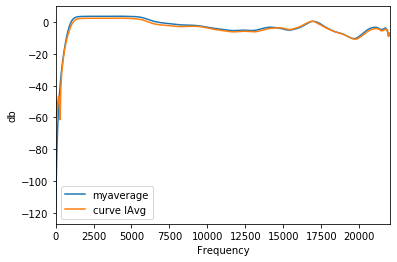

In [17]:
A=stft('/Users/eeeds/Desktop/yg/hpcf/HpCF_Beyerdynamic_Custom_One_Pro_A.wav',1024)
B=stft('/Users/eeeds/Desktop/yg/hpcf/HpCF_Beyerdynamic_Custom_One_Pro_B.wav',1024)
C=stft('/Users/eeeds/Desktop/yg/hpcf/HpCF_Beyerdynamic_Custom_One_Pro_C.wav',1024)
D=stft('/Users/eeeds/Desktop/yg/hpcf/HpCF_Beyerdynamic_Custom_One_Pro_D.wav',1024)
E=stft('/Users/eeeds/Desktop/yg/hpcf/HpCF_Beyerdynamic_Custom_One_Pro_E.wav',1024)
F=stft('/Users/eeeds/Desktop/yg/hpcf/HpCF_Beyerdynamic_Custom_One_Pro_F.wav',1024)
AVG = (A+B+C+D+E+F)/6
print(AVG.shape)
x=np.linspace(0,22050,num=513)
plt.plot(x,AVG,label='myaverage')
tandp('fft','Avg','curve lAvg','/Users/eeeds/Desktop/yg/hpcf/fftAvg')

44100
44100
44100
44100
44100
44100
44100


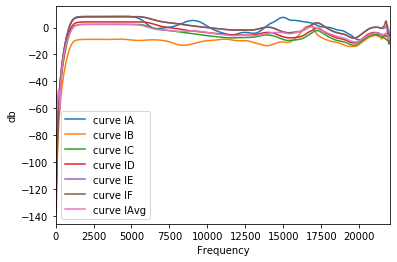

In [32]:
tandp('fft','A','curve lA','/Users/eeeds/Desktop/yg/hpcf/fftA')
tandp('fft','B','curve lB','/Users/eeeds/Desktop/yg/hpcf/fftB')
tandp('fft','C','curve lC','/Users/eeeds/Desktop/yg/hpcf/fftC')
tandp('fft','D','curve lD','/Users/eeeds/Desktop/yg/hpcf/fftD')
tandp('fft','E','curve lE','/Users/eeeds/Desktop/yg/hpcf/fftE')
tandp('fft','F','curve lF','/Users/eeeds/Desktop/yg/hpcf/fftF')
tandp('fft','Avg','curve lAvg','/Users/eeeds/Desktop/yg/hpcf/fftAvg')


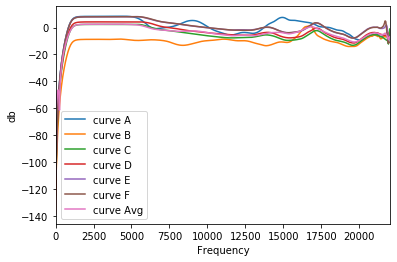

In [58]:
tandp('stft','A','curve A','/Users/eeeds/Desktop/yg/hpcf/stftA')
tandp('stft','B','curve B','/Users/eeeds/Desktop/yg/hpcf/stftB')
tandp('stft','C','curve C','/Users/eeeds/Desktop/yg/hpcf/stftC')
tandp('stft','D','curve D','/Users/eeeds/Desktop/yg/hpcf/stftD')
tandp('stft','E','curve E','/Users/eeeds/Desktop/yg/hpcf/stftE')
tandp('stft','F','curve F','/Users/eeeds/Desktop/yg/hpcf/stftF')
tandp('stft','Avg','curve Avg','/Users/eeeds/Desktop/yg/hpcf/stftAvg')

In [75]:
x=np.random.rand(10,1)
d=scipy.fft.fft(x)
d1=scipy.fft.ifft(d)
print(x)
print(d1)
print(x==d1)

[[0.97183532]
 [0.00330589]
 [0.40228519]
 [0.75265551]
 [0.24081356]
 [0.33733347]
 [0.44799588]
 [0.73944012]
 [0.92998872]
 [0.31052514]]
[[0.97183532-0.j]
 [0.00330589-0.j]
 [0.40228519-0.j]
 [0.75265551-0.j]
 [0.24081356-0.j]
 [0.33733347-0.j]
 [0.44799588-0.j]
 [0.73944012-0.j]
 [0.92998872-0.j]
 [0.31052514-0.j]]
[[ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]]


In [77]:
d,s = sf.read('/Users/eeeds/Desktop/yg/hpcf/HpCF_Beyerdynamic_Custom_One_Pro_E.wav')

x = scipy.fft.fft(d,axis=-1) 

d1 = scipy.fft.ifft(x,axis=-1) 

print()

print(d1==d)
#print(np.real(scipy.fft.ifft(scipy.fft.fft(d)))==d)

[ True  True False False  True  True False False False  True False False
 False  True False False False False False False False  True False False
 False False False False False False False False False  True False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False  True False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False Fa

In [90]:
import sofa
    
left_mea=260
right_mea=296
emitter=0
receiver=0

pathC = '/Users/eeeds/Desktop/yg/mit_kemar_normal_pinna.sofa'
    
pathA=f'E://yonggang/hpcfE/Eaudio0001firsthalf.wav'   

filename='/Users/eeeds/Desktop/yg/duolaoa.wav'

HRTF = sofa.Database.open(pathC)
 
leftIR = HRTF.Data.IR.get_values(indices={'M':left_mea,'R':emitter,'E':receiver})
leftIR=leftIR.reshape(512,1)
rightIR= HRTF.Data.IR.get_values(indices={'M':right_mea,'R':emitter,'E':receiver})
rightIR=rightIR.reshape(512,1)
    #fourier transoform .
leftFT = scipy.fft.fft(leftIR,axis=-1) 
    
rightFT = scipy.fft.fft(rightIR,axis=-1) 

    #inverse transform to get the time domain transfer function
left = scipy.fft.ifft(leftFT,axis=-1) 
    
right = scipy.fft.ifft(1/rightFT,axis=-1) 
#print(np.abs(right)==np.real(right))
#print (right)
print(np.real(left)==leftIR)

[[ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 

C:\Users\eeeds\anaconda3\envs\tf2yonggang\lib\site-packages\ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in true_divide
C:\Users\eeeds\anaconda3\envs\tf2yonggang\lib\site-packages\ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in true_divide
